# Hogg 2017 Data analysis recipes: MCMC

## Problem 1

#### Mean
- Also known as "expected value," it is the weighted average of the possible values, using their probabilities as weights.

#### Variance
- Variance is the expectation (arithmetic mean) of the squared standard deviation of a random variable from its mean. Think of it generally as the spread of the data from the mean and simplistically as the square of the S.D. It is also the covariance of the random variable with itself, represented as sigma squared (as in the matrix in the other Hogg tutorial, 2010).

#### Skewness
- A measure of the extent to which a pmf (probability mass function - for discrete variables) or pdf (probability density function - for continuous variables) leans to one side of the mean. Think of it as a measure of the asymmetry about the mean. It can be positive, negative, zero, or undefined.

#### Kurtosis
- A measure of the fatness of the tails of a pmf or pdf. Think of tall, narrow distribution w/ small tails as positive kurtosis (leptokurtic), and a wider, tophat distribution as negative kurtosis (platykurtic).



- The mean is the first standardized moment of a distribution, variance is the second, skewness the third, and kurtosis the fourth.

#### Uniform Distribution
- Mean: $E(X)={\frac{1}{2}}(a+b).$ = 0.5
- Variance: $V(X)={\frac {1}{12}}(b-a)^{2}$ = 0.083
- Skewness: zero
- Kurtosis: ${\frac{9}{5}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [27]:
# Analytically
analytic_mean = 0.5
analytic_variance = 1/12
analytic_skewness = 0
analysitc_kurtosis = 1.8

In [3]:
K = 1000
sample = np.random.uniform(size = K)

In [6]:
# Mean
mean = sum(sample)/K
mean

0.48975889280447454

In [24]:
# Variance

variance = 0

for i in sample:
    var = ((i - mean)**2)
    variance = variance + var
    
variance = variance/(K-1)
variance

0.07989714136739358

In [25]:
# Skewness

sd = math.sqrt(variance)
skewness = 0

for i in sample:
    skew = (((i - mean)/sd)**3)
    skewness = skewness + skew
    
skewness = skewness/(K-1)
skewness

0.07089217677082142

In [26]:
# Kurtosis

kurtosis = 0

for i in sample:
    kurt = (((i - mean)/sd)**4)
    kurtosis = kurtosis + kurt

    
kurtosis = kurtosis/(K-1)
kurtosis

1.8531932568072045

In [97]:
def uniform_distribution(n):
    
    K = 4**n
    sample = np.random.uniform(size = K)
    ns = np.empty(10)
    means = np.empty(10)
    variances = np.empty(10)
    skewnesses = np.empty(10)
    kurtosises = np.empty(10)
    inverse_K = np.empty(10)
    
    # Mean
    mean = sum(sample)/K
    means[n-1] = mean
    
    # Variance
    variance = 0
    for i in sample:
            var = ((i - mean)**2)
            variance = variance + var
    variance = variance/(K-1)
    variances[n-1] = variance
    
    # Skewness
    sd = math.sqrt(variance)
    skewness = 0
    for i in sample:
            skew = (((i - mean)/sd)**3)
            skewness = skewness + skew
    skewness = skewness/(K-1)
    skewnesses[n-1] = skewness
    
    # Kurtosis
    kurtosis = 0
    for i in sample:
            kurt = (((i - mean)/sd)**4)
            kurtosis = kurtosis + kurt
    kurtosis = kurtosis/(K-1)
    kurtosises[n-1] = kurtosis
    
    ns[n-1] = n
    inverse_K[n-1] = 1/K
    return (ns, means, variances, skewnesses, kurtosises, inverse_K)

def results_table(ns, means, variances, skewnesses, kurtosises, inverse_K):
    results = pd.DataFrame(columns = ["n", "mean", "variance", "skewness", "kurtosis", "1/K"])
    results["n"] = ns
    results["mean"] = means
    results["variance"] = variances
    results["skewness"] = skewnesses
    results["kurtosis"] = kurtosises
    results["1/K"] = inverse_K
    return results

In [98]:
uniform_distribution(1)
uniform_distribution(2)
uniform_distribution(3)
uniform_distribution(4)
uniform_distribution(5)
uniform_distribution(6)
uniform_distribution(7)
uniform_distribution(8)
uniform_distribution(9)
(ns, means, variances, skewnesses, kurtosises, inverse_K) = uniform_distribution(10)

In [99]:
results = results_table(ns, means, variances, skewnesses, kurtosises, inverse_K)

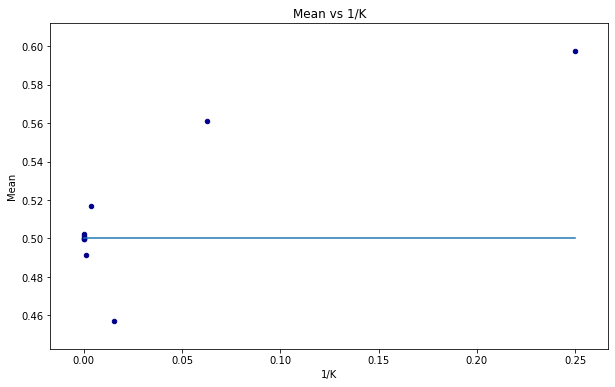

In [126]:
results.plot(kind='scatter', x='1/K', y='mean', figsize=(10, 6), color='darkblue')

plt.title('Mean vs 1/K')
plt.xlabel('1/K')
plt.ylabel('Mean')
plt.plot([0, 0.25], [0.5, 0.5])

mean_plot = plt.show()

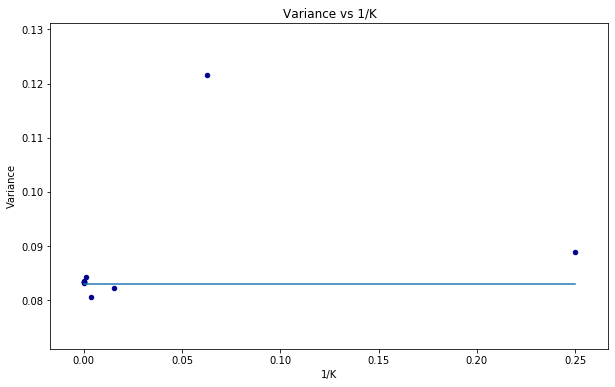

In [122]:
results.plot(kind='scatter', x='1/K', y='variance', figsize=(10, 6), color='darkblue')

plt.title('Variance vs 1/K')
plt.xlabel('1/K')
plt.ylabel('Variance')
plt.plot([0,0.25], [0.083, 0.083])

plt.show()

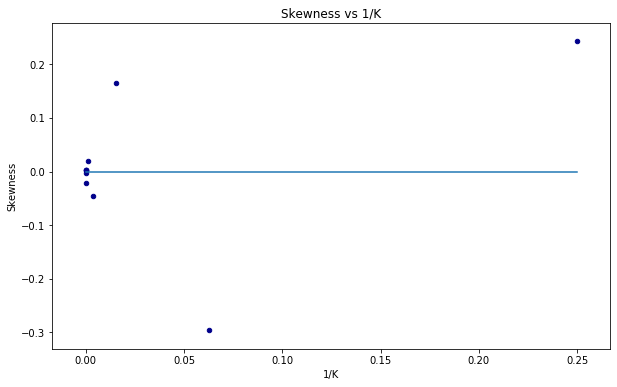

In [124]:
results.plot(kind='scatter', x='1/K', y='skewness', figsize=(10, 6), color='darkblue')

plt.title('Skewness vs 1/K')
plt.xlabel('1/K')
plt.ylabel('Skewness')
plt.plot([0,0.25], [0, 0])

plt.show()

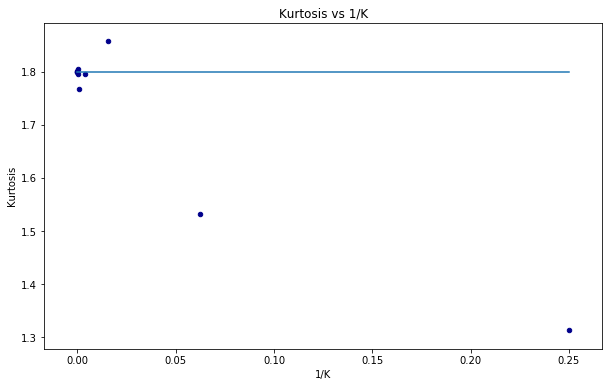

In [123]:
results.plot(kind='scatter', x='1/K', y='kurtosis', figsize=(10, 6), color='darkblue')

plt.title('Kurtosis vs 1/K')
plt.xlabel('1/K')
plt.ylabel('Kurtosis')
plt.plot([0,0.25], [1.8, 1.8])

plt.show()

### Conclusion to problem 1:
#### As you sample more points from a uniform distribution, the standardized moments of mean, variance, skewness, and kurtosis approach the analytic values.

## Problem 2

#### Create a Metropolis-Hastings MCMC algorithm. Sample from a Gaussian of mean 2 and variance 2. Give the sampler a proposal distribution q(x' | x) a Gaussian pdf for x' with mean x and variance 1. Initialize the sampler with x = 0 and run the sampler for more than 10^4 steps. Plot the results as a histogram, with the true density over-plotted sensibly. 

##### Gaussian function:
${\displaystyle f(x)=ae^{-{\frac {(x-b)^{2}}{2c^{2}}}}}$

In [2]:
# Define the Gaussian pdf to be sampled

class MCMC_Gaussian(object):
    def __init__(self, nsamples=10**4, x0=0):
        self.chain = []
        self.nsamples = nsamples
        self.x = x0
        self.chain.append(self.x)
        
# A random number between 0 and 1 in a normal distribution         
    def r_value(self):
        self.r = np.random.normal(loc = 0.5, scale = 0.1)
        self.lnr = math.log(self.r)
        return self.lnr
        
# Randomly sample from proposal dist. - Gaussian centered on x - get y-value, take natural log
    def lnproposal(self):
        mu = self.x
        sigma = 1
        def f(x):
            return (1/(np.sqrt(2) * np.sqrt(2 * np.pi)) * np.exp((-((x - 2)/np.sqrt(2))**2)/2))
        self.x_prime = np.random.normal(loc = self.x, scale = 1)
        self.y_prime = f(self.x_prime)
        self.proposal = np.log(self.y_prime)
        return self.proposal
        
# Compute y-value for current location in target distribution, take natural log (log of probability)
    def lncurrent(self, mu = 2, sigma = np.sqrt(2)):
        def f(x):
            return (1/(sigma * np.sqrt(2 * np.pi)) * np.exp((-((x - mu)/sigma)**2)/2))
        self.y = f(self.x)
        self.current = np.log(self.y)
        return self.current
        
        #sample = np.random.normal(loc = mu, scale = math.sqrt(sig), size = 1)
        #self.post = np.log(sample)
        
# Check: if y_prime/y_current > r, append proposed x_prime, set next x to x_prime; else, append same x to chain
    def take_step(self):
        lnr = self.r_value()
        proposal = self.lnproposal()
        current = self.lncurrent()
        if (proposal - current) > lnr:
            self.chain.append(self.x_prime)
            self.x = self.x_prime
        else:
            self.chain.append(self.chain[-1])
        
    def run_mcmc(self):
        for i in np.arange(self.nsamples):
            self.take_step()
        return self.chain

In [5]:
test = MCMC_Gaussian()
chain = test.run_mcmc()

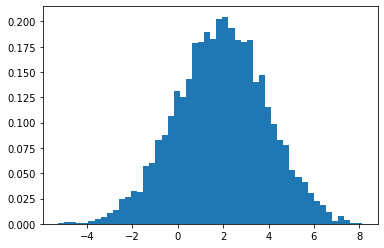

In [14]:
sigma = math.sqrt(2)
mu = 2
#s = np.random.normal(mu, sigma, 1000)

plt.hist(Lee.chain, 50, density=True)
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

In [ ]:
1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

In [7]:
class MCMC_Gaussian_Lee(object):
    def __init__(self, nsamples=10**4, x0=0):
        self.chain = []
        self.nsamples = nsamples
        self.x = x0
        self.chain.append(self.x)
    def proposal_gauss(self):
        return np.random.normal(self.x)
    def lnprior(self, x):
        return 0
    def lnpost(self, x, mu=2, sig=2):
        return self.lnprior(x) - 0.5*(np.log(2*np.pi*sig**2) + ((x - mu)**2)/sig**2)
    def take_step(self):
        proposal = self.proposal_gauss()
        r = np.random.uniform()
        if self.lnpost(proposal) - self.lnpost(self.x) > np.log(r):
            self.x = proposal
        self.chain.append(self.x)
    def run_mcmc(self):
        for n in np.arange(self.nsamples):
            self.take_step()



In [11]:
Lee = MCMC_Gaussian_Lee()
Lee.run_mcmc()